The following lines can be used to import Python Biogeme into Google Collaboratory

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install biogeme

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.1 MB/s 
  Created wheel for biogeme: filename=biogeme-3.2.10-cp38-cp38-linux_x86_64.whl size=4288808 sha256=17611f6e8d1a4805f0ba7c170bbbef49419e336cd13c84ffe770b0136dedbb8d
  Stored in directory: /root/.cache/pip/wheels/fc/00/7d/e38043a66199aad0b6ce4f764d8959a50739a7cba0a5ec4dae
Successfully built biogeme


In [4]:
import biogeme.database as db
import biogeme.biogeme as bio
import biogeme.models as models
from biogeme.expressions import Beta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Alternatlvely, you can assign the path (to your data file) to a variable. This line writes all data from swissmetro.dat to variable "data_file"
data_file = "/content/drive/MyDrive/UP253/final_data.csv"
taz_file = '/content/drive/MyDrive/UP253/TAZ_database.csv'

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# Prepare the data

df = pd.read_csv(data_file)
taz_df = pd.read_csv(taz_file)
df.head()

,originTAZ,destTAZ,tt_da,cost_da,tt_sr,cost_sr,tt_walk,tt_bike,tt_wt,accTime_wt,...,dist_car,accDist_dt,avail_da,avail_sr,avail_walk,avail_bike,avail_wt,avail_dt,choice,obsID
0,1308,1300,33.85,1.9765,33.85,0.98824,216.87,37.35,0.000,0.0,...,11.20,0.00,1,1,0,0,0,0,1,1
1,1269,1284,31.71,2.5306,31.71,1.26530,277.59,47.81,0.000,0.0,...,14.34,14.32,1,1,0,1,0,1,2,2
2,342,429,70.77,6.8065,70.77,3.40320,615.72,106.04,71.700,21.6,...,38.57,16.40,1,1,0,0,0,1,1,3
3,627,583,31.48,2.6929,31.48,1.34650,249.60,42.99,70.435,20.2,...,15.26,12.77,1,1,0,1,1,1,2,4
4,1296,1310,40.02,3.7006,40.02,1.85030,395.21,68.06,0.000,0.0,...,20.97,0.00,1,1,0,0,0,0,1,5


In [7]:
taz_df.head()

,taz1454,transit_access,district,county,terminal05,oprkcst05,prkcst05,residential,multifamily,res_density,LU_type_CBD,LU_type_Core,LU_type_Rural,LU_type_Suburban,LU_type_Urban,LU_type_UrbanBusiness,emp_density,hhinc__q1,hhinc__q2,hhinc__q3,hhinc__q4
0,566,38.933797,11,Santa Clara,1.20229,0.0,0.0,1,1,1.007794,0,0,0,1,0,0,0.938149,0,1,0,0
1,565,60.345733,11,Santa Clara,1.49836,0.0,0.0,1,1,3.749481,0,0,0,1,0,0,2.190454,0,0,1,0
2,570,14.029284,11,Santa Clara,1.70474,0.0,0.0,1,0,4.807330,0,0,0,0,1,0,1.778233,1,0,0,0
3,394,26.891365,9,Santa Clara,1.40512,0.0,0.0,1,0,2.695583,0,0,0,0,1,0,3.751195,1,0,0,0
4,450,46.036630,9,Santa Clara,1.45681,0.0,0.0,0,1,3.284792,0,0,0,0,1,0,5.445043,1,0,0,0


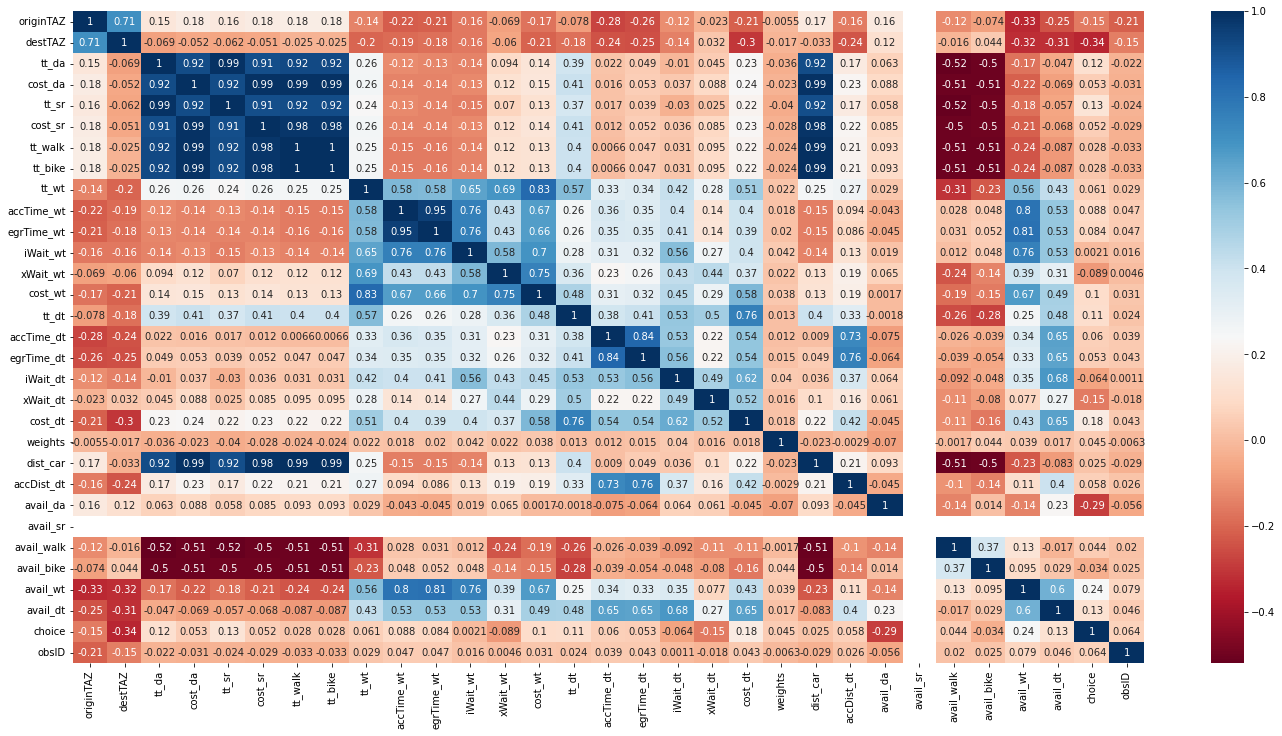

In [8]:
# This plots a correlation matrix for the dataframe: https://datatofish.com/correlation-matrix-pandas/
fig, ax = plt.subplots(figsize=(24, 12)) #Sets the figure frame and size, otherwise defaults used
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, cmap='RdBu', annot=True, ax=ax) 
plt.show()
#plt.savefig('/content/drive/MyDrive/UP253/corr_matrix.png', format='png')

In [9]:
df.describe()

,originTAZ,destTAZ,tt_da,cost_da,tt_sr,cost_sr,tt_walk,tt_bike,tt_wt,accTime_wt,egrTime_wt,iWait_wt,xWait_wt,cost_wt,tt_dt,accTime_dt,egrTime_dt,iWait_dt,xWait_dt,cost_dt,weights,dist_car,accDist_dt,avail_da,avail_sr,avail_walk,avail_bike,avail_wt,avail_dt,choice,obsID
count,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.0,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000,26701.000000
mean,742.240815,658.183027,66.239171,5.032650,63.354544,2.442095,480.454743,82.745023,42.536693,11.673904,11.663604,9.077736,9.839131,2.364608,40.120650,17.925652,18.284565,10.489561,7.076468,2.800754,90.501217,27.186944,8.133644,0.973447,1.0,0.265945,0.371409,0.549717,0.674357,1.851653,13351.000000
std,432.870512,452.260920,47.934730,4.972992,45.053066,2.429556,461.771921,79.527365,50.632497,10.825893,10.888713,8.633518,15.486769,2.473730,41.303642,14.082444,14.459956,8.183816,11.217280,2.183589,89.513461,26.397598,9.621504,0.160777,0.0,0.441843,0.483191,0.497531,0.468623,1.461201,7708.059105
min,1.000000,1.000000,5.900000,0.017647,5.900000,0.008823,2.050000,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,360.000000,311.000000,32.460000,1.404700,32.180000,0.682060,148.440000,25.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,6.120000,6.060000,3.380000,0.000000,1.170000,49.000000,7.960000,0.960000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,6676.000000
50%,734.000000,558.000000,52.030000,3.360000,50.110000,1.627900,327.410000,56.390000,25.040000,12.000000,11.800000,8.000000,0.000000,2.120000,32.405000,18.250000,18.570000,10.000000,0.000000,2.860000,67.500000,19.000000,5.320000,1.000000,1.0,0.000000,0.000000,1.000000,1.000000,1.000000,13351.000000
75%,1141.000000,1080.000000,89.070000,7.108200,83.470000,3.411200,668.090000,115.060000,70.040000,19.800000,19.800000,16.290000,17.500000,4.050000,60.780000,26.320000,26.910000,17.000000,12.290000,4.120000,100.000000,37.680000,11.680000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,20026.000000
max,1454.000000,1454.000000,527.300000,46.940000,465.880000,23.080000,4530.000000,780.170000,310.010000,46.800000,46.000000,24.000000,114.390000,18.640000,312.810000,105.330000,103.320000,24.000000,100.000000,17.620000,2762.000000,252.620000,90.620000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,6.000000,26701.000000


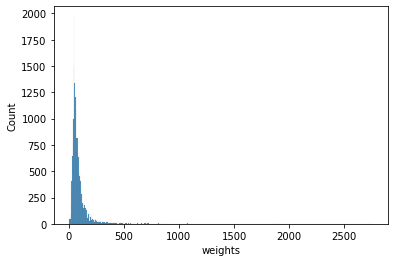

In [10]:
sns.histplot(x=df.weights)

In [7]:
taz_df.set_index('taz1454', inplace=True)
df = df.merge(taz_df[['res_density','emp_density','transit_access']], how='left', left_on='originTAZ', right_index=True)
df = df.merge(taz_df[['res_density','emp_density','transit_access']], how='left', left_on='destTAZ', right_index=True, suffixes=('_origin','_dest'))
df.head()

,originTAZ,destTAZ,tt_da,cost_da,tt_sr,cost_sr,tt_walk,tt_bike,tt_wt,accTime_wt,...,avail_wt,avail_dt,choice,obsID,res_density_origin,emp_density_origin,transit_access_origin,res_density_dest,emp_density_dest,transit_access_dest
0,1308,1300,33.85,1.9765,33.85,0.98824,216.87,37.35,0.000,0.0,...,0,0,1,1,0.026495,0.020411,0.000000,2.958920,1.314109,0.0
1,1269,1284,31.71,2.5306,31.71,1.26530,277.59,47.81,0.000,0.0,...,0,1,2,2,0.873418,0.659447,0.000000,1.103140,2.072296,0.0
2,342,429,70.77,6.8065,70.77,3.40320,615.72,106.04,71.700,21.6,...,0,1,1,3,0.425150,0.518369,1.273001,0.000000,10.016217,0.0
3,627,583,31.48,2.6929,31.48,1.34650,249.60,42.99,70.435,20.2,...,1,1,2,4,2.377575,1.347492,0.000000,1.514192,3.112052,0.0
4,1296,1310,40.02,3.7006,40.02,1.85030,395.21,68.06,0.000,0.0,...,0,0,1,5,0.622264,0.466221,0.000000,0.635001,1.121699,0.0


In [8]:
database = db.Database('BATS', df) #create a database using the data in the datafile (df)
globals().update(database.variables) #update global variables to include each element (column) in the dataset


# Multi-nomial Logit with Transit Access Percentage and Densities

In [9]:
# Model Specification

# Parameters to be estimated
# Arguments:
#   - 1  Name for report; Typically, the same as the variable.
#   - 2  Starting value.
#   - 3  Lower bound.
#   - 4  Upper bound.
#   - 5  0: estimate the parameter, 1: keep it fixed.

ASC_DA = Beta('ASC_DA',0,None,None,0)
ASC_SR = Beta('ASC_SR', 0, None, None,0)
ASC_WT = Beta('ASC_WT',0,None,None,0)
ASC_DT = Beta('ASC_DT',0,None,None,0)
ASC_W = Beta('ASC_W', 0,None,None, 0)

B_TIME = Beta('B_TIME',0,None,None,0)
B_TIME_DRIVE = Beta('B_TIME_DRIVE',0,None,None,0)
B_TIME_TRANSIT = Beta('B_TIME_TRANSIT',0,None,None,0)

B_COST = Beta('B_COST',0,None,None,0)
B_COST_DA = Beta('B_COST_DA',0,None,None,0)
B_COST_SR = Beta('B_COST_SR',0,None,None,0)
B_COST_TRANSIT = Beta('B_COST_TRANSIT',0,None,None,0)

B_Res_Dens_Orig = Beta('B_Res_Dens_Orig',0,None,None,0)
B_Res_Dens_Dest = Beta('B_Res_Dens_Dest',0,None,None,0)
B_Emp_Dens_Orig = Beta('B_Emp_Dens_Orig',0,None,None,0)
B_Emp_Dens_Dest = Beta('B_Emp_Dens_Dest',0,None,None,0)

B_Access_Orig_WT = Beta('B_Access_Orig_WT',0,None,None,0)
B_Access_Dest_WT = Beta('B_Access_Dest_WT',0,None,None,0)
B_Access_Orig_DT = Beta('B_Access_Orig_DT',0,None,None,0)
B_Access_Dest_DT = Beta('B_Access_Dest_DT',0,None,None,0)
B_Access_Dest_Gen = Beta('B_Access_Dest_Gen',0,None,None,0)

B_ACCESS_EGRESS_TIME = Beta('B_ACC_EGR_TIME',0,None,None,0)
B_WAIT_TIME = Beta('B_WAIT_TIME',0,None,None,0)
B_TRANSFER_TIME = Beta('B_TRANSFER_TIME',0,None,None,0)
B_DIST_CAR = Beta('B_DIST_CAR',0,None,None,0)
B_ACCDIST_DT = Beta('B_ACCDIST_DT',0,None,None,0)


In [12]:
# Specification of utilities

V1 = ASC_DA + B_TIME_DRIVE * tt_da + B_COST_DA * cost_da + B_DIST_CAR * dist_car
V2 = ASC_SR + B_TIME_DRIVE * tt_sr + B_COST_SR * cost_sr + B_DIST_CAR * dist_car

V3 = ASC_W + B_TIME * tt_walk
V4 = B_TIME * tt_bike

V5 = ASC_WT + B_TIME_TRANSIT * tt_wt + B_COST_TRANSIT * cost_wt + \
     B_ACCESS_EGRESS_TIME * (accTime_wt + egrTime_wt) + B_WAIT_TIME * iWait_wt + B_TRANSFER_TIME * xWait_dt + \
     B_Res_Dens_Dest * res_density_dest + \
     B_Emp_Dens_Dest * emp_density_dest + \
     B_Access_Orig_WT * transit_access_origin + B_Access_Dest_WT * transit_access_dest
     
V6 = ASC_DT + B_TIME_TRANSIT * tt_dt + B_COST_TRANSIT * cost_dt + \
     B_ACCDIST_DT * accDist_dt + B_ACCESS_EGRESS_TIME * (accTime_wt + egrTime_wt) + B_WAIT_TIME * iWait_dt + B_TRANSFER_TIME * xWait_dt + \
     B_Emp_Dens_Dest * emp_density_dest + \
     B_Access_Dest_DT * transit_access_dest

In [15]:
# Associate utility functions with the numbering of alternatives
V = {1: V1,
     2: V2,
     3: V3,
     4: V4,
     5: V5,
     6: V6}

In [10]:
# Associate the availability conditions with the alternatives
av = {1: avail_da,
      2: avail_sr,
      3: avail_walk,
      4: avail_bike,
      5: avail_wt,
      6: avail_dt}

In [17]:
# Definition of nests:
# 1: nests parameter
# 2: list of alternatives
#rail = MU, [1, 2]
#car = 1.0, [3]
#nests = rail, car

In [18]:
# Definition of the model. This is the contribution of each
# observation to the log likelihood function.
# models.lognested for nested, models.loglogit for mnl
logprob = models.loglogit(V, av, choice)

In [19]:

# Initialize Biogeme
biogeme = bio.BIOGEME(database,logprob)
biogeme.modelName = "logittest"

In [20]:
#Run Biogeme to estimate model and store results
results = biogeme.estimate()

[18:08:05] < Warning >   Cannot read file __logittest.iter. Statement is ignored.


In [21]:
pandasResults = results.getEstimatedParameters()
pandasResults

,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_DA,3.255439,0.122898,26.488892,0.000000e+00
ASC_DT,1.630580,0.179059,9.106381,0.000000e+00
ASC_SR,2.098028,0.123819,16.944293,0.000000e+00
ASC_W,2.211560,0.152409,14.510699,0.000000e+00
ASC_WT,2.471789,0.178333,13.860536,0.000000e+00
B_ACCDIST_DT,-0.095194,0.004887,-19.480367,0.000000e+00
B_ACC_EGR_TIME,-0.015798,0.001679,-9.411732,0.000000e+00
B_Access_Dest_DT,0.013846,0.001183,11.700183,0.000000e+00
B_Access_Dest_WT,0.008847,0.000994,8.901659,0.000000e+00
B_Access_Orig_WT,0.004974,0.000799,6.229324,4.684526e-10


In [22]:
print(results)



Results for model logittest
Output file (HTML):			logittest.html
Nbr of parameters:		21
Sample size:			26701
Excluded data:			0
Init log likelihood:		-34420.22
Final log likelihood:		-20865.05
Likelihood ratio test (init):		27110.34
Rho square (init):			0.394
Rho bar square (init):			0.393
Akaike Information Criterion:	41772.1
Bayesian Information Criterion:	41944.15
Final gradient norm:		0.1338001
ASC_DA         : 3.26[0.0718 45.3 0][0.123 26.5 0]
ASC_DT         : 1.63[0.147 11.1 0][0.179 9.11 0]
ASC_SR         : 2.1[0.0738 28.4 0][0.124 16.9 0]
ASC_W          : 2.21[0.0849 26 0][0.152 14.5 0]
ASC_WT         : 2.47[0.143 17.3 0][0.178 13.9 0]
B_ACCDIST_DT   : -0.0952[0.00437 -21.8 0][0.00489 -19.5 0]
B_ACC_EGR_TIME : -0.0158[0.0016 -9.9 0][0.00168 -9.41 0]
B_Access_Dest_DT: 0.0138[0.00118 11.7 0][0.00118 11.7 0]
B_Access_Dest_WT: 0.00885[0.000963 9.18 0][0.000994 8.9 0]
B_Access_Orig_WT: 0.00497[0.00077 6.46 1.04e-10][0.000799 6.23 4.68e-10]
B_COST_DA      : -1.13[0.0271 -41.9 0][0.0

# Drive based Nests

In [13]:
MU_Drive = Beta('MU_Drive',1,1,10,0)
Drive = MU_Drive, [1,2]
W = 1,[3]
B = 1, [4]
WT = 1, [5]
DT = 1, [6]

nests = Drive, W, B, WT, DT

drive_nested = models.lognested(V, av, nests, choice)
biogeme_drive = bio.BIOGEME(database,drive_nested)
biogeme_drive.modelName = "logittest_drivenests"
results_drive = biogeme_drive.estimate()

pandasResults_drive = results_drive.getEstimatedParameters()
pandasResults_drive

[18:47:06] < Warning >   Cannot read file __logittest_drivenests.iter. Statement is ignored.


,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_DA,3.251227,0.122402,26.561854,0.000000e+00
ASC_DT,1.684351,0.174363,9.660016,0.000000e+00
ASC_SR,2.444720,0.129780,18.837348,0.000000e+00
ASC_W,2.208244,0.150405,14.681972,0.000000e+00
ASC_WT,2.546388,0.173871,14.645260,0.000000e+00
B_ACCDIST_DT,-0.093296,0.004732,-19.716781,0.000000e+00
B_ACC_EGR_TIME,-0.016124,0.001603,-10.057557,0.000000e+00
B_Access_Dest_DT,0.012937,0.001138,11.363019,0.000000e+00
B_Access_Dest_WT,0.007317,0.000892,8.200002,2.220446e-16
B_Access_Orig_WT,0.005796,0.000781,7.424051,1.136868e-13


In [25]:
print(results_drive)


Results for model logittest_drivenests
Output file (HTML):			logittest_drivenests.html
Nbr of parameters:		22
Sample size:			26701
Excluded data:			0
Init log likelihood:		-34420.22
Final log likelihood:		-20835.1
Likelihood ratio test (init):		27170.25
Rho square (init):			0.395
Rho bar square (init):			0.394
Akaike Information Criterion:	41714.2
Bayesian Information Criterion:	41894.43
Final gradient norm:		0.06330756
ASC_DA         : 3.26[0.0701 46.5 0][0.123 26.6 0]
ASC_DT         : 1.59[0.145 10.9 0][0.176 9 0]
ASC_SR         : 2.44[0.0796 30.6 0][0.13 18.7 0]
ASC_W          : 2.22[0.0844 26.3 0][0.15 14.7 0]
ASC_WT         : 2.47[0.141 17.5 0][0.176 14.1 0]
B_ACCDIST_DT   : -0.0937[0.00432 -21.7 0][0.00474 -19.8 0]
B_ACC_EGR_TIME : -0.0156[0.00157 -9.95 0][0.00162 -9.64 0]
B_Access_Dest_DT: 0.0143[0.00117 12.2 0][0.00116 12.3 0]
B_Access_Dest_WT: 0.00863[0.000947 9.12 0][0.000962 8.97 0]
B_Access_Orig_WT: 0.0055[0.000761 7.22 5.01e-13][0.000787 6.98 2.86e-12]
B_COST_DA      : -0

In [26]:
results_drive.likelihood_ratio_test(results)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=59.90599558297981, threshold=3.841458820694124)

# Drive Nests no transit wait time


In [11]:
V1 = ASC_DA + B_TIME_DRIVE * tt_da + B_COST_DA * cost_da + B_DIST_CAR * dist_car
V2 = ASC_SR + B_TIME_DRIVE * tt_sr + B_COST_SR * cost_sr + B_DIST_CAR * dist_car

V3 = ASC_W + B_TIME * tt_walk
V4 = B_TIME * tt_bike

V5 = ASC_WT + B_TIME_TRANSIT * tt_wt + B_COST_TRANSIT * cost_wt + \
     B_ACCESS_EGRESS_TIME * (accTime_wt + egrTime_wt) + B_WAIT_TIME * iWait_wt + \
     B_Res_Dens_Dest * res_density_dest + \
     B_Emp_Dens_Dest * emp_density_dest + \
     B_Access_Orig_WT * transit_access_origin + B_Access_Dest_WT * transit_access_dest
     
V6 = ASC_DT + B_TIME_TRANSIT * tt_dt + B_COST_TRANSIT * cost_dt + \
     B_ACCDIST_DT * accDist_dt + B_ACCESS_EGRESS_TIME * (accTime_wt + egrTime_wt) + B_WAIT_TIME * iWait_dt + \
     B_Emp_Dens_Dest * emp_density_dest + \
     B_Access_Dest_DT * transit_access_dest

V = {1: V1,
     2: V2,
     3: V3,
     4: V4,
     5: V5,
     6: V6}

MU_Drive = Beta('MU_Drive',1,1,10,0)
Drive = MU_Drive, [1,2]
W = 1,[3]
B = 1, [4]
WT = 1, [5]
DT = 1, [6]

nests = Drive, W, B, WT, DT

notransfer_nested = models.lognested(V, av, nests, choice)
biogeme_notransfer = bio.BIOGEME(database,notransfer_nested)
biogeme_notransfer.modelName = "logittest_notransfer"
results_notransfer = biogeme_notransfer.estimate()

pandasResults_notransfer = results_notransfer.getEstimatedParameters()
pandasResults_notransfer

[18:45:05] < Warning >   Cannot read file __logittest_notransfer.iter. Statement is ignored.


,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_DA,3.251227,0.122402,26.561854,0.000000e+00
ASC_DT,1.684351,0.174363,9.660016,0.000000e+00
ASC_SR,2.444720,0.129780,18.837348,0.000000e+00
ASC_W,2.208244,0.150405,14.681972,0.000000e+00
ASC_WT,2.546388,0.173871,14.645260,0.000000e+00
B_ACCDIST_DT,-0.093296,0.004732,-19.716781,0.000000e+00
B_ACC_EGR_TIME,-0.016124,0.001603,-10.057557,0.000000e+00
B_Access_Dest_DT,0.012937,0.001138,11.363019,0.000000e+00
B_Access_Dest_WT,0.007317,0.000892,8.200002,2.220446e-16
B_Access_Orig_WT,0.005796,0.000781,7.424051,1.136868e-13


In [14]:
print(results_notransfer)


Results for model logittest_notransfer
Output file (HTML):			logittest_notransfer.html
Nbr of parameters:		21
Sample size:			26701
Excluded data:			0
Init log likelihood:		-34420.22
Final log likelihood:		-20842.56
Likelihood ratio test (init):		27155.33
Rho square (init):			0.394
Rho bar square (init):			0.394
Akaike Information Criterion:	41727.12
Bayesian Information Criterion:	41899.16
Final gradient norm:		0.1510098
ASC_DA         : 3.25[0.07 46.5 0][0.122 26.6 0]
ASC_DT         : 1.68[0.142 11.8 0][0.174 9.66 0]
ASC_SR         : 2.44[0.0793 30.8 0][0.13 18.8 0]
ASC_W          : 2.21[0.0843 26.2 0][0.15 14.7 0]
ASC_WT         : 2.55[0.139 18.3 0][0.174 14.6 0]
B_ACCDIST_DT   : -0.0933[0.00431 -21.6 0][0.00473 -19.7 0]
B_ACC_EGR_TIME : -0.0161[0.00156 -10.3 0][0.0016 -10.1 0]
B_Access_Dest_DT: 0.0129[0.00112 11.6 0][0.00114 11.4 0]
B_Access_Dest_WT: 0.00732[0.000881 8.3 0][0.000892 8.2 2.22e-16]
B_Access_Orig_WT: 0.0058[0.000756 7.67 1.71e-14][0.000781 7.42 1.14e-13]
B_COST_DA    

In [29]:
results_notransfer.likelihood_ratio_test(results)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=59.90599558297981, threshold=3.841458820694124)

# No Nests, Dropped ...

In [ ]:
V1 = ASC_DA + B_TIME_DRIVE * tt_da + B_COST_DA * cost_da + B_DIST_CAR * dist_car
V2 = ASC_SR + B_TIME_DRIVE * tt_sr + B_COST_SR * cost_sr + B_DIST_CAR * dist_car

V3 = ASC_W + B_TIME * tt_walk
V4 = B_TIME * tt_bike

V5 = ASC_WT + B_TIME_TRANSIT * tt_wt + B_COST_TRANSIT * cost_wt + \
     B_ACCESS_EGRESS_TIME * (accTime_wt + egrTime_wt) + B_WAIT_TIME * iWait_wt + B_TRANSFER_TIME * xWait_dt + \
     B_Res_Dens_Dest * res_density_dest + \
     B_Emp_Dens_Dest * emp_density_dest + \
     B_Access_Orig_WT * transit_access_origin + B_Access_Dest_Gen * transit_access_dest
     
V6 = ASC_DT + B_TIME_TRANSIT * tt_dt + B_COST_TRANSIT * cost_dt + \
     B_ACCDIST_DT * accDist_dt + B_ACCESS_EGRESS_TIME * (accTime_wt + egrTime_wt) + B_WAIT_TIME * iWait_dt + B_TRANSFER_TIME * xWait_dt + \
     B_Emp_Dens_Dest * emp_density_dest + \
     B_Access_Dest_Gen * transit_access_dest

In [ ]:
V = {1: V1,
     2: V2,
     3: V3,
     4: V4,
     5: V5,
     6: V6}

nested = models.loglogit(V, av, choice)

In [ ]:
biogeme_n = bio.BIOGEME(database,nested)
biogeme_n.modelName = "logittest_n"
results_n = biogeme_n.estimate()

[19:06:39] < Warning >   Cannot read file __logittest_n.iter. Statement is ignored.


In [ ]:
pandasResults_n = results_n.getEstimatedParameters()
pandasResults_n

,Value,Rob. Std err,Rob. t-test,Rob. p-value
ASC_DA,3.258399,0.122910,26.510551,0.000000e+00
ASC_DT,1.862465,0.169356,10.997331,0.000000e+00
ASC_SR,2.100020,0.123830,16.958959,0.000000e+00
ASC_W,2.210357,0.152347,14.508704,0.000000e+00
ASC_WT,2.351009,0.175937,13.362823,0.000000e+00
B_ACCDIST_DT,-0.094794,0.004853,-19.532893,0.000000e+00
B_ACC_EGR_TIME,-0.015207,0.001633,-9.309546,0.000000e+00
B_Access_Dest_Gen,0.010646,0.000876,12.152930,0.000000e+00
B_Access_Orig_WT,0.004907,0.000810,6.058918,1.370400e-09
B_COST_DA,-1.140774,0.027643,-41.267978,0.000000e+00


In [ ]:
print(results_n)


Results for model logittest_n
Output file (HTML):			logittest_n.html
Nbr of parameters:		20
Sample size:			26701
Excluded data:			0
Init log likelihood:		-34420.22
Final log likelihood:		-20873.79
Likelihood ratio test (init):		27092.87
Rho square (init):			0.394
Rho bar square (init):			0.393
Akaike Information Criterion:	41787.57
Bayesian Information Criterion:	41951.42
Final gradient norm:		0.1040044
ASC_DA         : 3.26[0.0718 45.4 0][0.123 26.5 0]
ASC_DT         : 1.86[0.134 13.9 0][0.169 11 0]
ASC_SR         : 2.1[0.0738 28.5 0][0.124 17 0]
ASC_W          : 2.21[0.0849 26 0][0.152 14.5 0]
ASC_WT         : 2.35[0.14 16.8 0][0.176 13.4 0]
B_ACCDIST_DT   : -0.0948[0.00435 -21.8 0][0.00485 -19.5 0]
B_ACC_EGR_TIME : -0.0152[0.00157 -9.67 0][0.00163 -9.31 0]
B_Access_Dest_Gen: 0.0106[0.000868 12.3 0][0.000876 12.2 0]
B_Access_Orig_WT: 0.00491[0.000775 6.33 2.49e-10][0.00081 6.06 1.37e-09]
B_COST_DA      : -1.14[0.0271 -42.2 0][0.0276 -41.3 0]
B_COST_SR      : -2.38[0.0547 -43.4 0][0.

In [ ]:
results_n.likelihood_ratio_test(results)

LRTuple(message='H0 can be rejected at level 5.0%', statistic=17.469107958349923, threshold=3.841458820694124)